In [30]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sn

In [31]:
document = pd.read_csv("electricity-normalized.csv")
document

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


In [32]:
document.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


In [33]:
document.drop(['date'], axis=1)

,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN
...,...,...,...,...,...,...,...,...
45307,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263,DOWN
45308,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614,DOWN
45309,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281,DOWN
45310,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579,UP


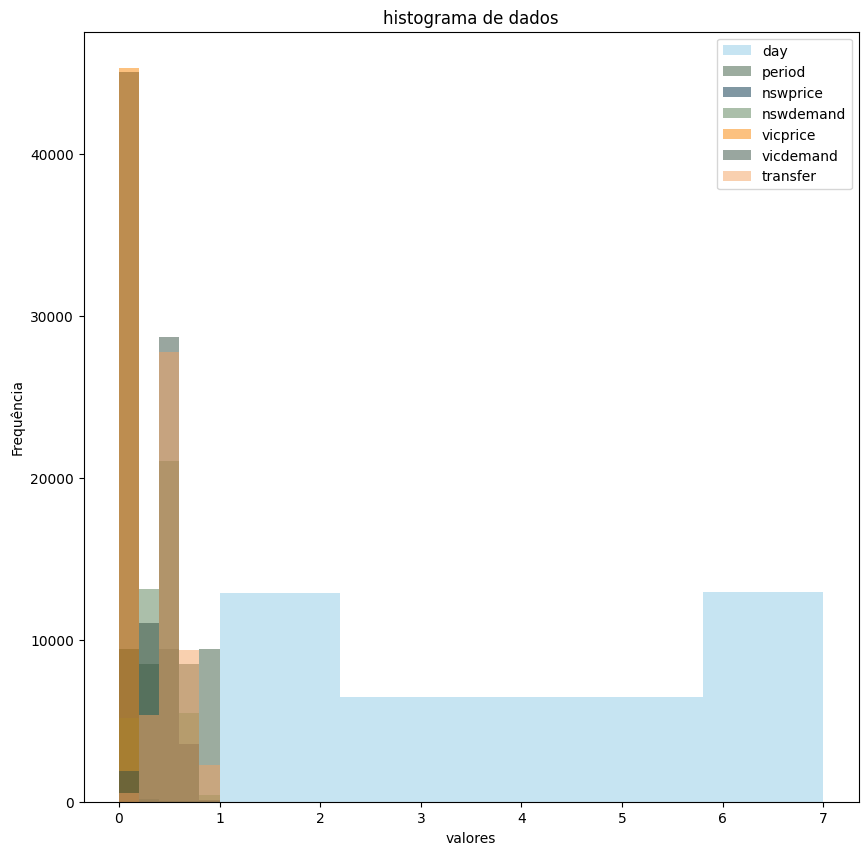

In [46]:
numeric = document[["day", "period", "nswprice", "nswdemand", "vicprice", "vicdemand", "transfer"]]

colors = ['#8ecae6', '#3a5a40', '#023047', '#588157', '#fb8500', '#344e41', '#f4a261']


pl.figure(figsize=(10, 10))

for i, column in enumerate(numeric.columns):
    pl.hist(numeric[column], bins= 5, alpha= 0.5, label=column, color=colors[i])

pl.title('histograma de dados')
pl.xlabel('valores')
pl.ylabel('Frequência')
pl.legend()

pl.show()

<Axes: xlabel='class'>

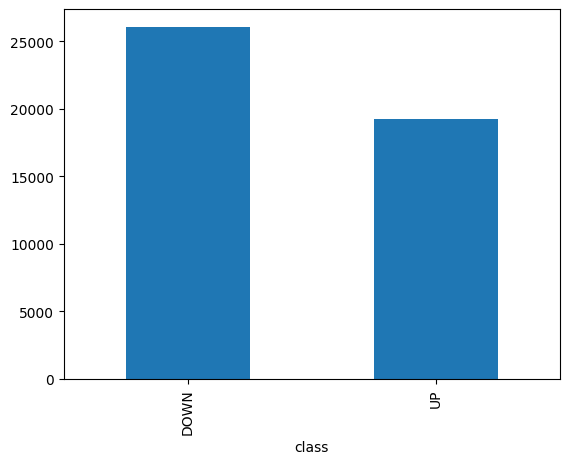

In [48]:
document['class'].value_counts().plot(kind='bar')

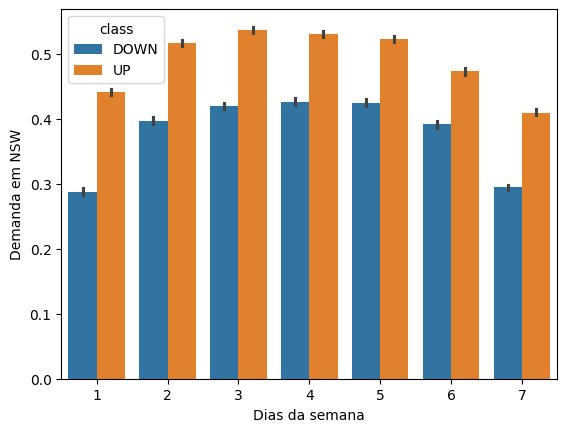

In [49]:
sn.barplot(data=document, x='day', y='nswdemand', hue='class')

pl.xlabel('Dias da semana')
pl.ylabel('Demanda em NSW')

pl.show()